# Lab 2: Linear regression
---

Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from   scipy import stats

Load the data set in the companion **demodataset.csv**

In [2]:
data = np.loadtxt("demodataset.csv", delimiter=",")

np.set_printoptions(precision=5)
np.set_printoptions(suppress=True)
data

array([[  -0.878,  -32.208],
       [   1.36 ,   49.178],
       [   1.64 ,   63.384],
       [   0.542,   50.955],
       [   0.825,   76.403],
       [  -0.596,  -90.715],
       [  -0.056,   30.239],
       [  -0.132,  -29.705],
       [  -2.435, -139.298],
       [  -0.404,  -10.483],
       [   0.382,   34.85 ],
       [   1.367,  103.15 ],
       [  -0.748,  -25.526],
       [  -0.382,    7.506],
       [   0.842,   52.244],
       [  -0.077,    7.081],
       [   0.433,   76.325],
       [  -0.217,  -52.17 ],
       [   1.468,   71.62 ],
       [   0.113,   -0.239],
       [   1.731,   17.363],
       [  -0.336,  -19.43 ],
       [  -1.099,  -39.712],
       [  -0.842,  -71.2  ],
       [   0.566,   25.936],
       [  -1.058,  -65.185],
       [   0.695,    7.989],
       [   0.539,   25.539],
       [   0.502,   55.364],
       [  -1.439,  -83.49 ],
       [  -0.189,   -2.155],
       [  -0.074,    4.711],
       [  -1.793,  -19.926],
       [   2.231,  105.28 ],
       [   0.0

---
Extract the first column in the data set to vector **x** and the second column to vector **y**.   

Plot a figure showing the dataset as: {$(x^{(i)},y^{(i)}) | i=1,…, m $}

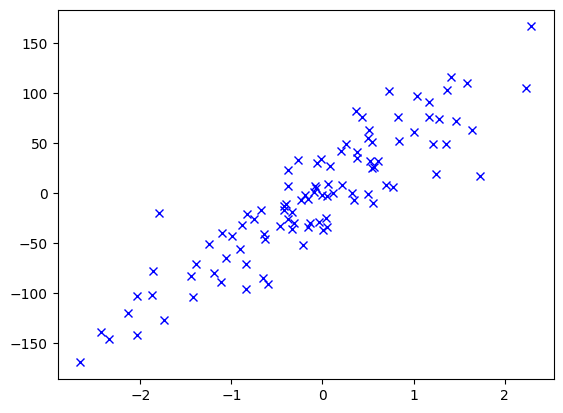

In [3]:
x=data[:,0] # x is the first  column in the data set
y=data[:,1] # y is the second column in the data set

plt.plot(x, y, "x", color = "blue")
plt.show()

---
1. a) Compute $θ_0^*$ and $θ_1^*$ for the line of best fit. \
\
i) using scipy.stats.linregress():

In [4]:
Θ1, Θ0, r, p, std_err = stats.linregress(x, y)  # theta1 = slope, theta0 = intercept y axis
print('Θ0 (intercept) = {:.3f}'.format(Θ0))
print('Θ1 (slope)     = {:.3f}'.format(Θ1))

Θ0 (intercept) = 0.802
Θ1 (slope)     = 56.758


1 a) \
\
ii)	implementing the linear regression model below using numpy functions

In [5]:
def linear_regression(x, y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)

    xs = np.subtract(x, mean_x)
    ys = np.subtract(y, mean_y)

    num = np.dot(xs, ys)
    den = np.dot(xs, xs)

    theta1 = num / den
    theta0 = mean_y - theta1 * mean_x

    return theta0, theta1

1 a)\
\
iii)	check that i) and ii) produce the same results

In [6]:
theta1, theta0, r, p, std_err = stats.linregress(x, y)
print("i) function:")
print('Θ0 (intercept) = {:.3f}'.format(theta0))
print('Θ1 (slope)     = {:.3f}'.format(theta1))

print()

my_theta0, my_theta1 = linear_regression(x, y)
print("ii) function:")
print('Θ0 (intercept) = {:.3f}'.format(my_theta0))
print('Θ1 (slope)     = {:.3f}'.format(my_theta1))


i) function:
Θ0 (intercept) = 0.802
Θ1 (slope)     = 56.758

ii) function:
Θ0 (intercept) = 0.802
Θ1 (slope)     = 56.758


---
1. b) Superimpose the line of best fit to the data

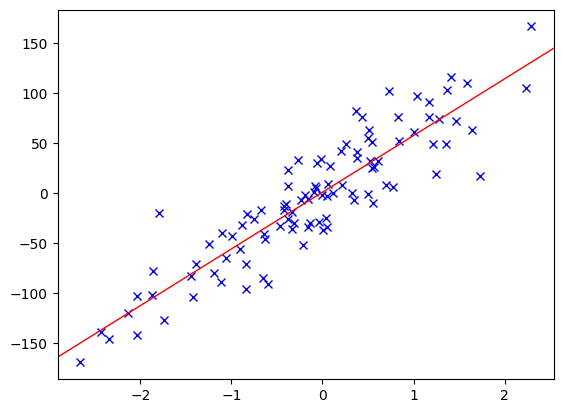

In [7]:
theta0, theta1 = linear_regression(x, y)

plt.plot(x, y, "x", color = "blue")
plt.axline((0, theta0), slope=theta1, color="red", linewidth=1)

plt.show()

---
1. c)	Predict y for x = 2.231. What is the corresponding residual? Superimpose on the graphic obtained in b)

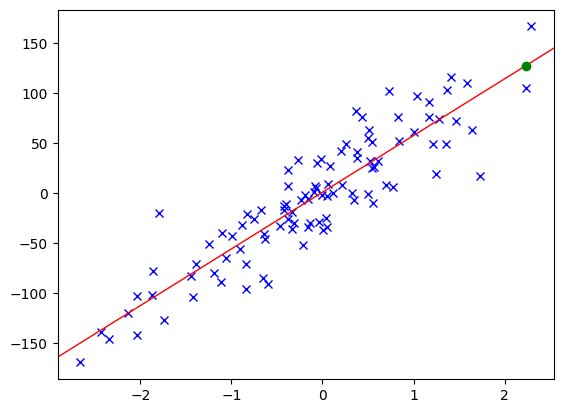

real value:		105.28
predicted value:	127.42982246113705
residual:		-22.14982246113705


In [8]:

def predict(theta0, theta1, x):
    return theta0 + x * theta1
    predict_x = x
    predict_y = theta0 + predict_x * theta1
    return predict_y

theta0, theta1 = linear_regression(x, y)

predict_x = 2.231
predict_y = predict(theta0, theta1, predict_x)
real_x = 2.231
real_y = 105.280
residual = real_y - predict_y


plt.plot(x, y, "x", color = "blue")
plt.axline((0, theta0), slope=theta1, color="red", linewidth=1)
plt.plot(predict_x, predict_y, "o", color = "green") 

plt.show()

print(f"real value:\t\t{real_y}")
print(f"predicted value:\t{predict_y}")
print(f"residual:\t\t{residual}")

---
2. a) \
\
i) Compute $J(θ_0^*, θ_1^*)$ for the dataset.

In [9]:
# without using matrices first

theta_0, theta_1 = linear_regression(x, y)

m = len(x)

total_sum = 0;
for i in range(m):
    h = predict(theta_0, theta_1, x[i])
    err = h - y[i]
    total_sum += err * err

J = total_sum / (2 * m)

print(f"J(theta_0_star, theta_1_star) = {J}")

J(theta_0_star, theta_1_star) = 392.76131567061725


---
2. a)\
\
i) Express the cost function: \
\
 $\qquad J(θ_0, \dots , θ_n) = \frac{1}{2m}\sum_{i=1}^{m} (h_θ(\mathbf x^{(i)}) - y^{(i)})^2$ \
\
in vectorial notation and compute it for the given dataset

- Considering a dataset with $m$ data points (or samples), $n$ features and 1 target or label. \
$\mathbf X$ matrix has $m$ rows, one for each data point and $1 + n$ columns, the left most for $bias$ and the rest for the features. \
$\mathbf y$ vector has $m$ rows, one for each target: \
\
$
\qquad 
\begin{split}
\mathbf{X}_{m\times (1+n)} &=
\begin{bmatrix}
    1 & x_1^{(1)}   & x_2^{(1)} & \dots & x_n^{(1)}\\
    1 & x_1^{(2)}   & x_2^{(2)} & \dots & x_n^{(2)}\\
    & & \vdots & &\\
    1 & x_1^{(m)} & x_2^{(m)} & \dots & x_n^{(m)}\\
\end{bmatrix}
\quad\quad
\mathbf{y} &=
\begin{bmatrix}
    y^{(1)}\\
    y^{(2)}\\
    \vdots \\
    y^{(m)}\\
\end{bmatrix}
\end{split} 
$

$\qquad$ and vector $\boldsymbol\theta$ for $n$ coefficients:

$
\qquad
\boldsymbol{\theta} = \begin{bmatrix}
θ_0 \\ θ_1 \\ \vdots \\ \theta_n
\end{bmatrix}
$

- The hypothesis function, for each $h^{(i)}$, where
$
\mathbf x^{(i)} = \begin{bmatrix}
1 & x_1^{(i)} & \dots & x_n^{(i)}
\end{bmatrix}
$
, given by: \
\
$$h_\theta(\mathbf x^{(i)}) = θ_0.1 + θ_1x_1^{(i)} + θ_2x_2^{(i)} + \dots + θ_2x_n^{(i)} $$

-  can be rewritten in vector form as the dot product of:

$$
\begin{split}
{h_\theta}(\mathbf x^{(i)}) &= 
\begin{bmatrix}
1 & x_1^{(i)} & \dots & x_n^{(i)}
\end{bmatrix}
\begin{bmatrix}
θ_0 \\ θ_1 \\ \vdots \\ \theta_n
\end{bmatrix} \\
{h_\theta}(\mathbf x^{(i)}) &= \mathbf x^{(i)}\boldsymbol{\theta}
\end{split}
$$

- and for $m$ data points, as:
$$
\begin{split}
h_θ(\mathbf{X}) &= \mathbf{X}\boldsymbol{\theta}
\end{split}
$$

- this will compute vector $\mathbf{h}$ with $m$ elements:
  
$$\mathbf{h} = \mathbf{X}\boldsymbol{\theta}$$

- Now, expressing the cost (or loss) function: 

$$J(θ_0, \dots , θ_n) = \frac{1}{2m}\sum_{i=1}^{m} (h_θ(\mathbf x^{(i)}) - y^{(i)})^2$$

- in vector notation:

$$
\begin{split}
J(θ_0, \dots , θ_n) &= \frac{1}{2m} (\mathbf{h} - \mathbf{y})^2 \\
J(θ_0, \dots , θ_n) &= \frac{1}{2m} (\mathbf{h} - \mathbf{y})^T(\mathbf{h} - \mathbf{y})
\end{split}
$$

- computing the residuals vector with:

$\qquad \qquad \mathbf{r} = \mathbf{h} - \mathbf{y}$

$$
      J(θ) = J(θ_0, \dots, θ_n) = \frac{1}{2m} \mathbf{r}^T\mathbf{r}
$$

---
compute $J(θ_0^*, θ_1^*)$ in vector notation, for the given dataset. 

In [10]:
def residuals(x, y):
    m = len(x)
    X = np.column_stack([np.ones_like(x), x])
    THETA = [theta_0, theta_1]
    
    h = np.dot(X, THETA)
    r = np.add(h, -y)
    return r

def calc_err(x, y, theta):
    m = len(x)
    h = np.dot(x, theta)
    r = np.add(h, -y)
    square_sum_r = np.dot(r, r)
    return square_sum_r / (2*m)

theta_1, theta_0, r, p, std_err = stats.linregress(x, y)

X = np.column_stack([np.ones_like(x), x])
THETA = [theta_0, theta_1]
J = calc_err(X, y, THETA)

print(f"J(theta_0_star, theta_1_star) = {J}")

J(theta_0_star, theta_1_star) = 392.7613156706172


---
2. a)\
\
ii)	Is there any advantage to computing in vector notation with NumPy?

Yes. Because NumPy optimizes matrix operations for multicore CPUs.

Furthermore, other tools like Tensorlow or PyTorch use vector notation interchangeably with NumPy (similar interfaces) to achieve even faster optimizations by running on GPUs and TPUs.

Another advantage is that NumPy and those other tools use compiled languages, which are faster than interpreted languages like python.

---
2. a)\
\
iii)	Show that point (average of X, average of Y) belongs to the line of best fit.

the line of best fit can be characterized as

$
\begin{split}
\qquad y = \theta_0 + \theta_1 x
\end{split}
$

and we know that

$
\begin{split}
\qquad \theta_0 &= \bar{y} - \theta_1 \bar{x}
\end{split}
$

so, replacing $ \theta_0 $ in the line of best fit, we get

$
\begin{split}
\qquad y = \bar{y} - \theta_1 \bar{x} + \theta_1 x
\end{split}
$

simplifying,

$
\begin{split}
\qquad y = \bar{y} + \theta_1 (x - \bar{x})
\end{split}
$

and finally, for $ x = \bar{x} $ we get

$
\begin{split}
\qquad y = \bar{y} + \theta_1 (\bar{x} - \bar{x})
\end{split}
$

which equates to

$
\begin{split}
\qquad y = \bar{y}
\end{split}
$

thus proving that the point $ (\bar{x}, \bar{y}) $ belongs to the line of best fit.

---
2. b) For $θ_0^*$ and $θ_1^*$, plot the residuals vs the independent variable x. Print the mean and variance of the residuals. Briefly comment on what you observe.

Residuals are the difference between the observed (y) and predicted responses (h). 

If the model is appropriate for the data, this should be reflected in the residuals. In particular, the graph of
residuals vs. independent variable should be centered in zero without any tendency:

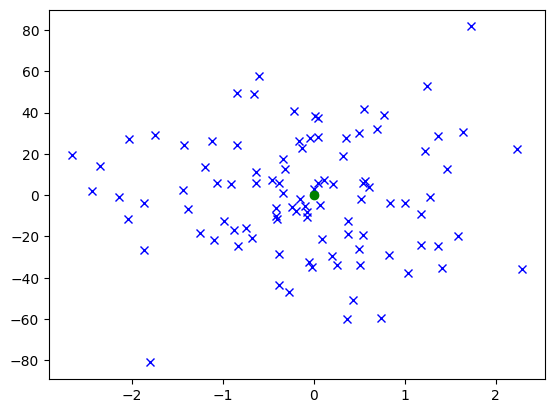

In [11]:
r = residuals(x, y)


plt.plot(x, r, "x", color = "blue")
plt.plot(0, 0, "o", color = "green")
plt.show()

The closer the residuals are from zero the smaller the cost J.

For the normal error regression model, it is assumed that the error term is normally distributed with null mean and
constant variance The mean and variance of the residuals are: 

It can be observed on the graph that the points seem to be centered around y=0, thus evidencing that the model is appropriate for the data.

In [12]:
r_mean = np.mean(r)
r_var = np.var(r, ddof=0)

print(f"residuals mean:\t\t{r_mean}")
print(f"residuals variance:\t{r_var}")

residuals mean:		-1.5454304502782179e-15
residuals variance:	785.5226313412345


---
2. c) For $θ_0^*$ and $θ_1^*$, analytically prove that the sum of residuals is zero. Print the sum of the residuals.



- ie. show that: $\qquad\qquad\qquad\qquad \sum_{i=1}^{m} \left( h_θ(x^{(i)}) - y^{(i)} \right) = 0 \qquad\qquad\qquad for: \qquad θ_0^*$,&emsp;$θ_1^*$

- since:

  $\qquad\qquad h_θ(x) = θ_0^* + θ_1^*x$

$$
\begin{split}
    \sum_{i=1}^{m} \left( h_θ(x^{(i)}) - y^{(i)}  \right) = \sum_{i=1}^{m} \left[ (θ_0^* + θ_1^*x)-y^{(i)} \right]
\end{split}
$$

- $θ_0^*$ is constant, so:
$$
\begin{split}
    &= mθ_0^*+ \sum_{i=1}^{m}(θ_1^*x^{(i)}-y^{(i)}) \\
    &= mθ_0^* + θ_1^* \sum_{i=1}^{m} x^{(i)} - \sum_{i=1}^{m} y^{(i)} \\
\end{split}
$$

- $\theta_0^* = \bar{y} - \theta_1^* \bar{x}$ , replacing:
$$
\begin{split}
    &= m(\bar{y} - \theta_1^* \bar{x}) + \theta_1^* \sum_{i=1}^{m} x^{(i)} - \sum_{i=1}^{m} y^{(i)} \\
    &= m \bar{y} - m \theta_1^* \bar{x} + \theta_1^* \sum_{i=1}^{m} x^{(i)} - \sum_{i=1}^{m} y^{(i)} \\
\end{split}
$$

- $\sum_{i=1}^{m} x^{(i)} = m \frac{\sum_{i=1}^{m} x^{(i)}}{m} = m\bar{x}$ , as such:
$$
\begin{split}
    &= m \bar{y} - m \theta_1^* \bar{x} + \theta_1^* m\bar{x} - m\bar{y} \\
    &= m (\bar{y} - \bar{y} + \theta_1^* \bar{x} - \theta_1^* \bar{x}) \\
    &= m ( 0 + 0 ) \\
    &= 0
\end{split}
$$




---
The Sum of the residuals is:

In [13]:
r = residuals(x, y)
r_sum = np.sum(r)

print(f"sum of the residuals: {r_sum}")

sum of the residuals: -1.545430450278218e-13


---
2. d) Prove that the derivative of the cost function in order to $\theta_j$ is:

$$
\begin{split}
& \frac{\partial}{\partial \theta_j} J(θ_0, \dots, θ_n) = 
 \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x_j^{(i)})-y^{(i)})   x_j^{(i)}\quad\text,\quad j=0,1 \dots n
\end{split}
$$

The derivative of the cost function in order to $\theta_j$: 

$$
\begin{split}
& \frac{\partial}{\partial \theta_j} \quad J(θ_0, \dots, θ_n) \\
& \frac{\partial}{\partial \theta_j} \quad \frac{1}{2m}\sum_{i=1}^{m} (h_θ(x_j^{(i)}) - y^{(i)})^2 \\
\end{split}
$$

using the derivative of the product rule: 

$\qquad (f.g)' = f'.g + f.g'$

and assuming: 

$
\begin{split}
& \quad f = \frac{1}{2m} \\
& \quad g = \sum_{i=1}^{m}(h_θ(x_j^{(i)}) - y^{(i)})^2
\end{split}
$

since it is a partial derivative in order to $\theta_j, f$ is constant, $f'$ is zero:

we have: $\qquad 0.g + f.g'$

now, using the derivative of the sum rule:

$
\begin{split}
 \qquad (f_0+f_1+\dots+f_n)' &= f_0'+f_1'+\dots+f_n' \\
 \quad (\sum_{i=1}^{m} f)' &= \sum_{i=1}^{m} f'
\end{split}
$

we got:

$$
\frac{1}{2m} \quad \sum_{i=1}^{m} \quad \frac{\partial}{\partial \theta_j} (h_θ(x_j^{(i)}) - y^{(i)})^2 
$$

using the derivative of the power rule:

$\qquad (g^n)' = n.g^{n-1}.g'$

we got:

$$
\frac{1}{\cancel 2 m} \quad \sum_{i=1}^{m} \quad \cancel 2.(h_θ(x_j^{(i)}) - y^{(i)}) \quad \frac{\partial}{\partial \theta_j} (h_θ(x_j^{(i)}) - y^{(i)}) 
$$

using the derivative of the difference rule:

$
\begin{split}
 \qquad (f_0-f_1-\dots-f_n)' &= f_0'-f_1'-\dots-f_n' \\
\end{split}
$

and noting that $ y^{(i)} $ does not depend on $ \theta_j $, we got:

$$
\frac{1}{m} \quad \sum_{i=1}^{m} \quad (h_θ(x_j^{(i)}) - y^{(i)}) \quad \frac{\partial}{\partial \theta_j} h_θ(x_j^{(i)})
$$

expanding $ h_θ(x_j^{(i)}) $:

$$
\frac{1}{m} \quad \sum_{i=1}^{m} \quad (h_θ(x_j^{(i)}) - y^{(i)}) \quad \frac{\partial}{\partial \theta_j} (\theta_0 x_0^{(i)} + \theta_1 x_1^{(i)} + \dots + \theta_n x_n^{(i)})
$$


as such, by applying the previously mentioned derivative of the sum rule, and noting that besides $ \theta_j x_j^{(i)} $ no other term depends on $ \theta_j $. Which means that for each $ j $, we reduce the expression to:

$$
\frac{1}{m} \sum_{i=1}^{m} (h_θ(x_j^{(i)}) - y^{(i)}) \frac{\partial}{\partial \theta_j} (\theta_j x_j^{(i)}) \quad , \quad j = 0, 1 \dots n
$$

finally, by using the derivative of the product rule once again and assuming:


$
\begin{split}
& \quad f = \theta_j \\
& \quad g = x_j^{(i)}
\end{split}
$

and since in order to $ \theta_j $ the term $ x_j^{(i)}$ is constant, $ g' $ is zero:

we have: $ \quad f'.g + 0.f $

furthermore: $ \quad \frac{\partial}{\partial \theta_j} \theta_j = 1$

we get:

$$
\frac{1}{m} \sum_{i=1}^{m} (h_θ(x_j^{(i)}) - y^{(i)}) x_j^{(i)} \quad , \quad j = 0, 1 \dots n
$$



List of derivative rules:

https://www.mathsisfun.com/calculus/derivatives-rules.html

---
3. a) Express in vector notation the following gradient descent updating expressions: </p>
$$\theta_j = \theta_j - \alpha \frac{1}{m} 
\sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})   x_j^{(i)}\quad\text,\quad j=0,1 \dots n$$

using $\mathbf{h}$, $\mathbf{y}$, $\boldsymbol{\theta}$ and $\mathbf{X}$ as defined in 2. a) ii):

We want

$ \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})   x_j^{(i)} $

such that for the vector form of

$ \boldsymbol{\theta} = \boldsymbol{\theta} - \alpha \frac{1}{m} \mathbf{s} $

where $ \mathbf{s} $ should be:

$$
\mathbf{s} = \begin{bmatrix}
    \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)}) x_0^{(i)} \\
    \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)}) x_1^{(i)} \\
    \vdots \\
    \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)}) x_n^{(i)} \\
\end{bmatrix}
$$

$$
= \begin{bmatrix}
    h_{\theta}(x^{(0)})-y^{(0)} + h_{\theta}(x^{(1)})-y^{(1)} + \dots + h_{\theta}(x^{(m)})-y^{(m)} \\
    [h_{\theta}(x^{(0)})-y^{(0)}]x_1^{(1)} + [h_{\theta}(x^{(1)})-y^{(1)}]x_1^{(2)} + \dots + [h_{\theta}(x^{(m)})-y^{(m)}]x_1^{(m)}\\
    \vdots \\
    [h_{\theta}(x^{(m)})-y^{(m)}]x_n^{(1)} + [h_{\theta}(x^{(m)})-y^{(m)}]x_n^{(2)} + \dots + [h_{\theta}(x^{(m)})-y^{(m)}]x_n^{(m)}\\
\end{bmatrix}
$$

$$
= \begin{bmatrix}
    1 & 1 & \dots & 1 \\
    x_1^{(1)} & x_1^{(2)} & \dots & x_1^{(m)}\\
    x_2^{(1)} & x_2^{(2)} & \dots & x_2^{(m)}\\
    \vdots & \vdots & \ddots & \vdots \\
    x_n^{(1)} & x_n^{(2)} & \dots & x_n^{(m)}\\
\end{bmatrix}
\begin{bmatrix}
    h_{\theta}(x^{(0)})-y^{(0)} \\
    h_{\theta}(x^{(1)})-y^{(1)} \\
    \vdots \\
    h_{\theta}(x^{(m)})-y^{(m)} \\
\end{bmatrix}
$$

$$
= \begin{bmatrix}
    1 & 1 & \dots & 1 \\
    x_1^{(1)} & x_1^{(2)} & \dots & x_1^{(m)}\\
    x_2^{(1)} & x_2^{(2)} & \dots & x_2^{(m)}\\
    \vdots & \vdots & \ddots & \vdots \\
    x_n^{(1)} & x_n^{(2)} & \dots & x_n^{(m)}\\
\end{bmatrix}
\begin{bmatrix}
    r^{(0)} \\
    r^{(1)} \\
    \vdots \\
    r^{(m)} \\
\end{bmatrix}
$$

$$
= \mathbf{X}^T\mathbf{r}
$$

Plugging $ \boldsymbol{s} $ we get:

$$
\boldsymbol{\theta} = \boldsymbol{\theta} - \alpha \frac{1}{m} \mathbf{X}^T\mathbf{r}
$$


---
3. b) Apply gradient descent and linear regression to the dataset. Find $\theta_0*, \theta_1*$ and $J(\theta_0^*,\theta_1^*)$.

In [14]:
def gradient_descent(x, y, theta, learning_rate):
    m = len(x)

    h = np.dot(x, theta)
    r = np.add(h, -y)

    x_t = np.transpose(x)
    derivative = np.dot(x_t, r)
    delta = - (learning_rate/m) * derivative

    new_theta = np.add(theta, delta)
    return new_theta

def gradient_descent_it(x, y, theta, learning_rate, iterations):
    new_theta = theta
    for i in range(iterations):
        new_theta = gradient_descent(x, y, new_theta, learning_rate)
    return new_theta

theta_0 = 1.0
theta_1 = 1.0
THETA = [theta_0, theta_1]
X = np.column_stack([np.ones_like(x), x])
learning_rate = 0.1
iterations = 110

new_theta = gradient_descent_it(X, y, THETA, learning_rate, iterations)
J = calc_err(X, y, new_theta)

print(f"theta_0: {new_theta[0]}")
print(f"theta_1: {new_theta[1]}")
print(f"J(theta_0, theta_1) = {J}")



theta_0: 0.8015232000014595
theta_1: 56.75788604072966
J(theta_0, theta_1) = 392.7613158775928


---
3. c) What is the number of iterations and the value of the learning rate $\alpha$, that approximate the $\theta$ vector and the cost J obtained in 3. b) to those found in 1. a) and 2. a)?

With learning rate $ \alpha = 0.1 $ and 110 iterations, $ \theta_0 $, $ \theta_1 $ and $ J(\theta_0, \theta_1) $ are already rounding up to the third decimal place to the values in 1. a) and 2. a).

---
3. d)	Plot $J(\theta_0,\theta_1)$ as a function of the number of iterations. Briefly comment on what you observe.

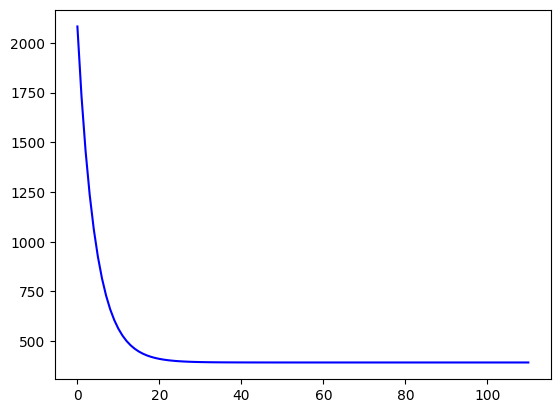

In [22]:
def gradient_descent_err_plot(x, y, theta, learning_rate, iterations):
    new_theta = theta
    costs = [ calc_err(x, y, new_theta) ]
    iters = [ 0 ]
    for i in range(iterations):
        new_theta = gradient_descent(x, y, new_theta, learning_rate)
        costs.append(calc_err(x, y, new_theta))
        iters.append(i + 1)
    return iters, costs


theta_0 = 1.0
theta_1 = 1.0
THETA = [theta_0, theta_1]
X = np.column_stack([np.ones_like(x), x])
learning_rate = 0.1
iterations = 110

iters, costs = gradient_descent_err_plot(X, y, THETA, learning_rate, iterations)

plt.plot(iters, costs, "-", color = "blue")
plt.show()


It can be observed that as the number of iterations go up, the cost rapidly decreases, meaning that the current thetas are approaching a line that fits the data better.

At the start we see a big improvement in cost reduction, as it is far from the optimum. As iterations go up, the difference in cost gets smaller, behaving assimptotically. This is because it becomes closer and closer to the optimum, converging towards it.